# Movie Recommendation Using Machine Learning

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from gensim.models import Word2Vec
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import pickle

In [3]:
#load data 
movies=pd.read_csv('dataset.csv')

In [5]:
#Top 5 rows
movies.head(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
0,278,The Shawshank Redemption,"Drama,Crime",en,Framed in the 1940s for the double murder of h...,94.075,1994-09-23,8.7,21862
1,19404,Dilwale Dulhania Le Jayenge,"Comedy,Drama,Romance",hi,"Raj is a rich, carefree, happy-go-lucky second...",25.408,1995-10-19,8.7,3731
2,238,The Godfather,"Drama,Crime",en,"Spanning the years 1945 to 1955, a chronicle o...",90.585,1972-03-14,8.7,16280
3,424,Schindler's List,"Drama,History,War",en,The true story of how businessman Oskar Schind...,44.761,1993-12-15,8.6,12959
4,240,The Godfather: Part II,"Drama,Crime",en,In the continuing saga of the Corleone crime f...,57.749,1974-12-20,8.6,9811
5,667257,Impossible Things,"Family,Drama",es,"Matilde is a woman who, after the death of her...",14.358,2021-06-17,8.6,255
6,129,Spirited Away,"Animation,Family,Fantasy",ja,"A young girl, Chihiro, becomes trapped in a st...",92.056,2001-07-20,8.5,13093
7,730154,Your Eyes Tell,"Romance,Drama",ja,"A tragic accident lead to Kaori's blindness, b...",51.345,2020-10-23,8.5,339
8,372754,Dou kyu sei – Classmates,"Romance,Animation",ja,"Rihito Sajo, an honor student with a perfect s...",14.285,2016-02-20,8.5,239
9,372058,Your Name.,"Romance,Animation,Drama",ja,High schoolers Mitsuha and Taki are complete s...,158.270,2016-08-26,8.5,8895


In [7]:
movies.describe()

,id,popularity,vote_average,vote_count
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [9]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  int64  
 1   title              10000 non-null  object 
 2   genre              9997 non-null   object 
 3   original_language  10000 non-null  object 
 4   overview           9987 non-null   object 
 5   popularity         10000 non-null  float64
 6   release_date       10000 non-null  object 
 7   vote_average       10000 non-null  float64
 8   vote_count         10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.3+ KB


In [11]:
movies.isnull().sum()

id                    0
title                 0
genre                 3
original_language     0
overview             13
popularity            0
release_date          0
vote_average          0
vote_count            0
dtype: int64

Feature Selection Part

In [14]:
movies.columns

Index(['id', 'title', 'genre', 'original_language', 'overview', 'popularity',
       'release_date', 'vote_average', 'vote_count'],
      dtype='object')

In [16]:
movies=movies[['id', 'title', 'overview', 'genre']]

In [18]:
movies

,id,title,overview,genre
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime"
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance"
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime"
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War"
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime"
...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy"
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure"
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War"
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama"


In [20]:
movies['tags'] = movies['overview']+movies['genre']

In [22]:
movies

,id,title,overview,genre,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...,"Drama,Crime",Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second...","Comedy,Drama,Romance","Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...","Drama,Crime","Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...,"Drama,History,War",The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...,"Drama,Crime",In the continuing saga of the Corleone crime f...
...,...,...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo...","Action,Adventure,Fantasy","The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...,"Action,TV Movie,Science Fiction,Comedy,Adventure",The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ...","Action,Science Fiction,War","During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...,"Adventure,Fantasy,Action,Drama",A man named Farmer sets out to rescue his kidn...


In [114]:
new_data  = movies.drop(columns=['overview', 'genre'])

In [116]:
new_data

,id,title,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...


# Feature Extraction

###  1. TF-IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [32]:
# Example to show how to use TfidfVectorizer
tfidf = TfidfVectorizer(max_features=10000, stop_words='english')
tfidf

TfidfVectorizer(max_features=10000, stop_words='english')

In [34]:
vector = tfidf.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [36]:
vector 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [38]:
# Check the shape of the resulting TF-IDF matrix
print(vector.shape)


(10000, 10000)


In [40]:
from sklearn.metrics.pairwise import cosine_similarity

In [42]:
similarity=cosine_similarity(vector)

In [43]:
similarity

array([[1.        , 0.01620488, 0.02669636, ..., 0.06022964, 0.04670032,
        0.0254026 ],
       [0.01620488, 1.        , 0.01160979, ..., 0.        , 0.0035672 ,
        0.        ],
       [0.02669636, 0.01160979, 1.        , ..., 0.01235843, 0.02225984,
        0.01920721],
       ...,
       [0.06022964, 0.        , 0.01235843, ..., 1.        , 0.00653857,
        0.00463921],
       [0.04670032, 0.0035672 , 0.02225984, ..., 0.00653857, 1.        ,
        0.00793266],
       [0.0254026 , 0.        , 0.01920721, ..., 0.00463921, 0.00793266,
        1.        ]])

In [44]:
pd.DataFrame(similarity)[1:5]

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
1,0.016205,1.000000,0.011610,0.003109,0.051847,0.003787,0.016663,0.016042,0.004762,0.010495,...,0.000000,0.035394,0.0,0.023124,0.000000,0.029739,0.004986,0.000000,0.003567,0.000000
2,0.026696,0.011610,1.000000,0.003072,0.442429,0.003743,0.032937,0.006253,0.000000,0.003070,...,0.011807,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.012358,0.022260,0.019207
3,0.003394,0.003109,0.003072,1.000000,0.003068,0.005371,0.018130,0.002487,0.000000,0.047251,...,0.000000,0.000000,0.0,0.000000,0.000000,0.022788,0.000000,0.091133,0.005060,0.000000
4,0.021502,0.051847,0.442429,0.003068,1.000000,0.025935,0.055293,0.017695,0.000000,0.003066,...,0.013490,0.000000,0.0,0.000000,0.008199,0.010284,0.000000,0.006146,0.003521,0.012787


In [45]:
new_data[new_data['title']=="The Godfather"].index[0]

2

In [46]:
distance = sorted(list(enumerate(similarity[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:31]:
    print(new_data.iloc[i[0]].title)

The Godfather
The Godfather: Part II
The Godfather: Part III
Blood Ties
The Best of Youth
Proud Mary
The Color Purple
Extremely Wicked, Shockingly Evil and Vile
Four Brothers
Road to Perdition
Joe
Xtreme
Rope
Shoplifters
The River Wild
A Man Apart
The Fountain
True Story
The Replacement Killers
I soliti idioti
Street Flow
3 Ninjas
All Three of Us
Running on Empty
The Sucker
Rampart
Loose Cannons
Mamma Roma
The Outsider
Summer of Sam
Michael Jackson's Thriller


In [125]:
def recommend(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:31]:
        print(new_data.iloc[i[0]].title)

In [127]:
recommend("Iron Man")

Iron Man
Iron Man 2
Iron Man 3
Avengers: Age of Ultron
Clown
Tau
Cradle 2 the Grave
Spider-Man: Homecoming
G.O.R.A.
Time Trap
The New Mutants
Room
The Wizards Return: Alex vs. Alex
The Disappearance of Alice Creed
The Anomaly
Charlie's Angels
The Dark Half
Ace in the Hole
Kung Fu Yoga
Hostage
Mad Max: Fury Road
Rififi
Ransom
Black Water: Abyss
Bāhubali: The Beginning
Dead Rising: Watchtower
Guardians of the Galaxy Vol. 2
Batman Begins
The Shape of Water
The Little Vampire
Missing in Action


In [28]:
print(movies['title'].unique())  # Print unique movie titles


['The Shawshank Redemption' 'Dilwale Dulhania Le Jayenge' 'The Godfather'
 ... 'Sharknado 3: Oh Hell No!' 'Captain America'
 'In the Name of the King: A Dungeon Siege Tale']


### 2. Word2Vector

In [52]:
# Fill missing values in 'tags' with an empty string
new_data['tags'] = new_data['tags'].fillna('')

# Drop rows with missing values in 'tags'
new_data = new_data.dropna(subset=['tags'])

import numpy as np
from gensim.models import Word2Vec

# Tokenize the 'tags' column
tokenized_tags = [tag.split() for tag in new_data['tags']]

# Create Word2Vec model after tokenizing the 'tags'
w2v_model = Word2Vec(sentences=tokenized_tags, vector_size=100, window=5, min_count=1, workers=4)

def get_vector(tags):
    words = tags.split()
    vector = np.zeros(100)  # Adjust size to match vector_size
    count = 0
    for word in words:
        if word in w2v_model.wv:
            vector += w2v_model.wv[word]
            count += 1
    if count > 0:
        vector /= count
    return vector

# Optional: You can create a new column for Word2Vec feature vectors after defining the get_vector function
new_data['word2vec'] = new_data['tags'].apply(get_vector)
from sklearn.metrics.pairwise import cosine_similarity

# Create a matrix of Word2Vec feature vectors
w2v_matrix = np.array(new_data['word2vec'].tolist())

# Calculate cosine similarity
w2v_similarity = cosine_similarity(w2v_matrix)

def w2v_recommend(movies):
    index = new_data[new_data['title'] == movies].index[0]
    distance = sorted(list(enumerate(w2v_similarity[index])), reverse=True, key=lambda vector: vector[1])
    for i in distance[0:31]:
        print(new_data.iloc[i[0]].title)

In [53]:
# Example usage
w2v_recommend("Iron Man")


Iron Man
The Siege
Inside Man: Most Wanted
The Thieves
Shimmer Lake
Max Payne
Happy End
Australia
Queenpins
Await Further Instructions
Runaway Train
We're the Millers
Hope Springs
Flash Point
The Sun Is Also a Star
The Misfits
Interceptor
The Bubble
Men in Black
Resident Evil: Vendetta
Hummingbird
A Most Wanted Man
The Doorman
The Ritual
Beyond Borders
To Be or Not to Be
The Haunting
Starship Troopers
Arachnophobia
Black Narcissus
A Dirty Shame


### 3.CountVectorizer

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [58]:
cv=CountVectorizer(max_features=10000, stop_words='english')

In [60]:
vector=cv.fit_transform(new_data['tags'].values.astype('U')).toarray()

In [61]:
vector.shape

(10000, 10000)

In [62]:
from sklearn.metrics.pairwise import cosine_similarity

In [63]:
similarity_cv=cosine_similarity(vector)

In [67]:
similarity_cv

array([[1.        , 0.05634362, 0.13041013, ..., 0.07559289, 0.11065667,
        0.06900656],
       [0.05634362, 1.        , 0.07715167, ..., 0.        , 0.03636965,
        0.        ],
       [0.13041013, 0.07715167, 1.        , ..., 0.02300219, 0.0673435 ,
        0.09449112],
       ...,
       [0.07559289, 0.        , 0.02300219, ..., 1.        , 0.03253   ,
        0.03042903],
       [0.11065667, 0.03636965, 0.0673435 , ..., 0.03253   , 1.        ,
        0.04454354],
       [0.06900656, 0.        , 0.09449112, ..., 0.03042903, 0.04454354,
        1.        ]])

In [68]:

new_data[new_data['title']=="The Godfather"].index[0]
distance = sorted(list(enumerate(similarity_cv[2])), reverse=True, key=lambda vector:vector[1])
for i in distance[0:31]:
    print(new_data.iloc[i[0]].title)



The Godfather
The Godfather: Part II
Blood Ties
Joker
Bomb City
Gotti
Felon
Rope
Batman: The Killing Joke
The Big Heat
The Outsider
Proud Mary
House of Gucci
In the Fade
The Wild Goose Lake
Road to Perdition
Life
The Replacement Killers
Chopper
Mystic River
The Iceman
The Unforgivable
The Punisher
Cassandra's Dream
Rampart
City by the Sea
The Batman
SPL: Kill Zone
Drishyam
Andhadhun
On My Skin


In [69]:
def recommend(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity_cv[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:31]:
        print(new_data.iloc[i[0]].title)

In [70]:
recommend("Iron Man")

Iron Man
Iron Man 3
Guardians of the Galaxy Vol. 2
Avengers: Age of Ultron
Star Wars: Episode III - Revenge of the Sith
G.O.R.A.
Iron Man 2
Charlie's Angels
Star Wars: Episode I - The Phantom Menace
Everything Everywhere All at Once
The Rocketeer
Dead Rising: Watchtower
Insurgent
The New Mutants
Deathstroke: Knights & Dragons - The Movie
Robot Overlords
Star Wars: The Force Awakens
Avatar
Small Soldiers
Stargate
Mazinger Z: Infinity
Mad Max Beyond Thunderdome
Ready Player One
Predator
Spectral
The Anomaly
The Humanity Bureau
Sharknado 3: Oh Hell No!
Lightyear
Resident Evil: Extinction
Justice League Dark


### Perfomance Metrics

### Performance Metrics 

In [98]:
from sklearn.metrics import precision_score, recall_score, f1_score

# True labels - These should reflect the actual relevant movies for a user (replace with actual data)
true_labels = ['Iron Man', 'Iron Man 2','Iron Man 3', 'Iron Man: Rise of Technovore','Iron Man']

# Predicted labels from each model (replace with actual recommendations from each model)
predicted_tfidf = ['Iron Man', 'Iron Man 2','Iron Man 3','Avengers: Age of Ultron','Clown']
predicted_count = ['Iron Man','Iron Man 3','Guardians of the Galaxy Vol. 2','Avengers: Age of Ultron','Star Wars: Episode III - Revenge of the Sith']
predicted_word2vec = ['Iron Man', 'The Siege','Inside Man: Most Wanted','The Thieves','Shimmer Lake']



# Function to calculate precision, recall, and F1-score
def calculate_metrics(true_labels, predicted_labels):
    y_true = [1 if movie in true_labels else 0 for movie in predicted_labels]  # 1 for relevant, 0 for not
    y_pred = [1] * len(true_labels) + [0] * (len(predicted_labels) - len(true_labels))  # This assumes the top N movies

    precision = precision_score(y_pred, y_true, zero_division=0)
    recall = recall_score(y_pred, y_true, zero_division=0)
    f1 = f1_score(y_pred, y_true, zero_division=0)
    return precision, recall, f1

# Mean Average Precision (MAP) calculation
def mean_average_precision(true_labels, predicted_labels):
    num_relevant = 0
    precision_sum = 0.0

    for idx, movie in enumerate(predicted_labels, start=1):
        if movie in true_labels:
            num_relevant += 1
            precision_sum += num_relevant / idx

    return precision_sum / len(true_labels) if num_relevant > 0 else 0

# Calculate metrics for TF-IDF
precision_tfidf, recall_tfidf, f1_tfidf = calculate_metrics(true_labels, predicted_tfidf)
map_tfidf = mean_average_precision(true_labels, predicted_tfidf)

# Calculate metrics for CountVectorizer
precision_count, recall_count, f1_count = calculate_metrics(true_labels, predicted_count)
map_count = mean_average_precision(true_labels, predicted_count)

# Calculate metrics for Word2Vec
precision_word2vec, recall_word2vec, f1_word2vec = calculate_metrics(true_labels, predicted_word2vec)
map_word2vec = mean_average_precision(true_labels, predicted_word2vec)

# Print results
print(f"TF-IDF - Precision: {precision_tfidf:.2f}, Recall: {recall_tfidf:.2f}, F1-Score: {f1_tfidf:.2f}, MAP: {map_tfidf:.2f}")
print(f"CountVectorizer - Precision: {precision_count:.2f}, Recall: {recall_count:.2f}, F1-Score: {f1_count:.2f}, MAP: {map_count:.2f}")
print(f"Word2Vec - Precision: {precision_word2vec:.2f}, Recall: {recall_word2vec:.2f}, F1-Score: {f1_word2vec:.2f}, MAP: {map_word2vec:.2f}")


TF-IDF - Precision: 1.00, Recall: 0.60, F1-Score: 0.75, MAP: 0.60
CountVectorizer - Precision: 1.00, Recall: 0.40, F1-Score: 0.57, MAP: 0.40
Word2Vec - Precision: 1.00, Recall: 0.20, F1-Score: 0.33, MAP: 0.20


### Visualization of Metrics

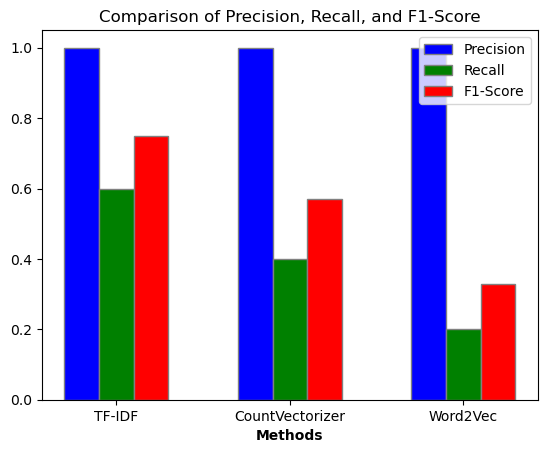

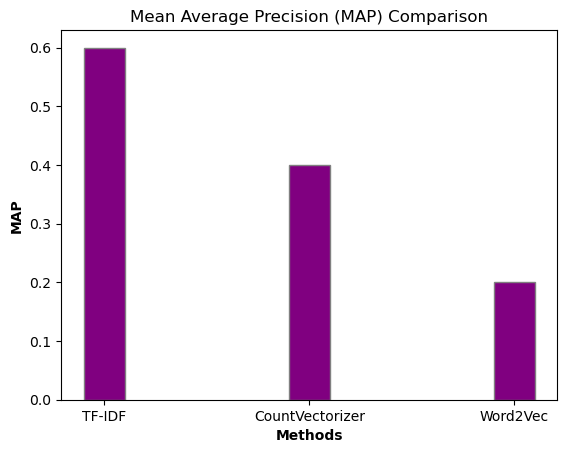

In [100]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics data
methods = ['TF-IDF', 'CountVectorizer', 'Word2Vec']
precision = [1.00, 1.00, 1.00]
recall = [0.60, 0.40, 0.20]
f1_score = [0.75, 0.57, 0.33]
map_values = [0.60, 0.40, 0.20]

# Set the bar width
bar_width = 0.2

# Set position of bars on X axis
r1 = np.arange(len(methods))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]

# Plotting precision, recall, and F1-score
plt.bar(r1, precision, color='blue', width=bar_width, edgecolor='grey', label='Precision')
plt.bar(r2, recall, color='green', width=bar_width, edgecolor='grey', label='Recall')
plt.bar(r3, f1_score, color='red', width=bar_width, edgecolor='grey', label='F1-Score')

# Add labels for the metrics
plt.xlabel('Methods', fontweight='bold')
plt.xticks([r + bar_width for r in range(len(methods))], methods)

# Add a legend
plt.legend()

# Show the plot
plt.title('Comparison of Precision, Recall, and F1-Score')
plt.show()

# Plotting Mean Average Precision (MAP)
plt.bar(methods, map_values, color='purple', width=bar_width, edgecolor='grey')

# Add labels for MAP
plt.xlabel('Methods', fontweight='bold')
plt.ylabel('MAP', fontweight='bold')

# Show the plot
plt.title('Mean Average Precision (MAP) Comparison')
plt.show()


##### TF-IDF is best choice for recommendation

### Save the model

In [ ]:
import pickle

In [ ]:
pickle.dump(new_data, open('movies_list.pkl', 'wb'))

In [ ]:
pickle.dump(similarity, open('similarity.pkl', 'wb'))

In [ ]:
pickle.load(open('movies_list.pkl', 'rb'))

### Load the model

In [ ]:
new_data= pickle.load(open('movies_list.pkl', 'rb'))
similarity= pickle.load(open('similarity.pkl', 'rb'))

In [129]:
def recommend(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:31]:
        print(new_data.iloc[i[0]].title)


In [131]:
def recommend(movies):
    index=new_data[new_data['title']==movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector:vector[1])
    for i in distance[0:31]:
        print(new_data.iloc[i[0]].title)

recommend("Iron Man")

Iron Man
Iron Man 2
Iron Man 3
Avengers: Age of Ultron
Clown
Tau
Cradle 2 the Grave
Spider-Man: Homecoming
G.O.R.A.
Time Trap
The New Mutants
Room
The Wizards Return: Alex vs. Alex
The Disappearance of Alice Creed
The Anomaly
Charlie's Angels
The Dark Half
Ace in the Hole
Kung Fu Yoga
Hostage
Mad Max: Fury Road
Rififi
Ransom
Black Water: Abyss
Bāhubali: The Beginning
Dead Rising: Watchtower
Guardians of the Galaxy Vol. 2
Batman Begins
The Shape of Water
The Little Vampire
Missing in Action


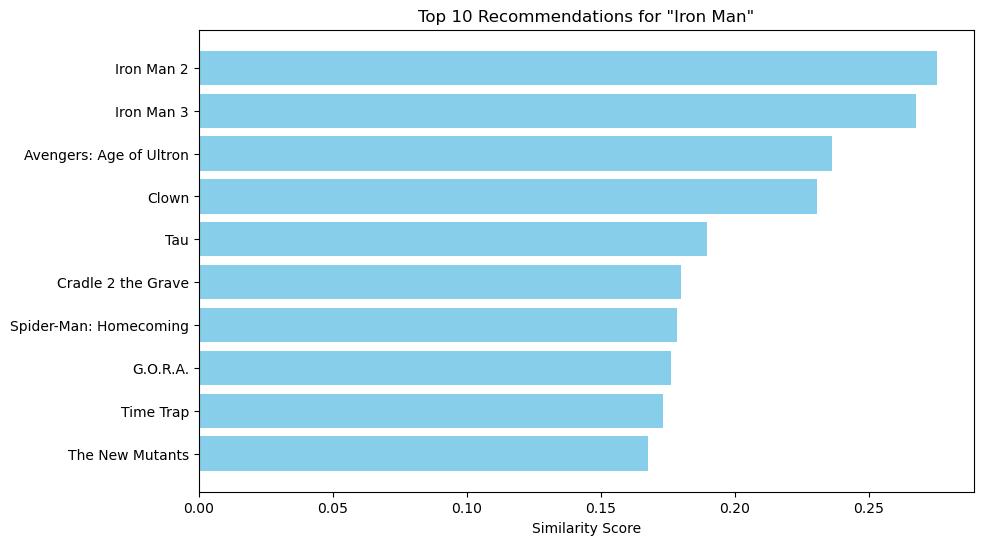

In [133]:
import matplotlib.pyplot as plt

def plot_recommendations(movies, num_recommendations=10):
    index = new_data[new_data['title'] == movies].index[0]
    distance = sorted(list(enumerate(similarity[index])), reverse=True, key=lambda vector: vector[1])
    recommended_movies = [new_data.iloc[i[0]].title for i in distance[1:num_recommendations+1]]
    scores = [i[1] for i in distance[1:num_recommendations+1]]

    plt.figure(figsize=(10, 6))
    plt.barh(recommended_movies, scores, color='skyblue')
    plt.xlabel('Similarity Score')
    plt.title(f'Top {num_recommendations} Recommendations for "{movies}"')
    plt.gca().invert_yaxis()
    plt.show()

plot_recommendations("Iron Man")


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Sample true labels (relevant movies) and predicted labels (recommended movies)
# Replace these with your actual true and predicted labels

true_labels = [1, 1, 1, 1, 1]  # True labels (1 = relevant movie, 0 = irrelevant)
predicted_labels_tfidf = [1, 1, 1, 0, 0]  # Predicted labels for TF-IDF
predicted_labels_count = [1, 1, 0, 0, 0]  # Predicted labels for CountVectorizer

# Calculate Precision, Recall, and F1-Score for TF-IDF
precision_tfidf = precision_score(true_labels, predicted_labels_tfidf, average='binary', zero_division=0)
recall_tfidf = recall_score(true_labels, predicted_labels_tfidf, average='binary', zero_division=0)
f1_tfidf = f1_score(true_labels, predicted_labels_tfidf, average='binary', zero_division=0)

# Calculate Precision, Recall, and F1-Score for CountVectorizer
precision_count = precision_score(true_labels, predicted_labels_count, average='binary', zero_division=0)
recall_count = recall_score(true_labels, predicted_labels_count, average='binary', zero_division=0)
f1_count = f1_score(true_labels, predicted_labels_count, average='binary', zero_division=0)

# Print the results
print(f"Precision (TF-IDF): {precision_tfidf}")
print(f"Recall (TF-IDF): {recall_tfidf}")
print(f"F1-Score (TF-IDF): {f1_tfidf}")

print(f"Precision (CountVectorizer): {precision_count}")
print(f"Recall (CountVectorizer): {recall_count}")
print(f"F1-Score (CountVectorizer): {f1_count}")


Precision (TF-IDF): 1.0
Recall (TF-IDF): 0.6
F1-Score (TF-IDF): 0.75
Precision (CountVectorizer): 1.0
Recall (CountVectorizer): 0.4
F1-Score (CountVectorizer): 0.5714285714285714


In [24]:
#Statistical Hypothesis 1
import numpy as np
from scipy import stats

# Example F1-scores for TF-IDF and CountVectorizer (replace these with your actual F1-scores)
f1_tfidf = [0.75, 0.78, 0.76, 0.77, 0.79]  # F1-scores for TF-IDF
f1_count = [0.57, 0.60, 0.58, 0.59, 0.62]  # F1-scores for CountVectorizer

# Perform the paired t-test
t_stat, p_value = stats.ttest_rel(f1_tfidf, f1_count)

# Print the t-statistic and p-value
print("t-statistic:", t_stat)
print("p-value:", p_value)

# Set alpha (significance level)
alpha = 0.05  # Common significance level

# Interpret the result
if p_value < alpha:
    print("Reject the null hypothesis: Significant difference between TF-IDF and CountVectorizer.")
else:
    print("Fail to reject the null hypothesis: No significant difference between TF-IDF and CountVectorizer.")


t-statistic: 88.99999999999994
p-value: 9.554892177917839e-08
Reject the null hypothesis: Significant difference between TF-IDF and CountVectorizer.


In [26]:
#Statistical Hypothesis 2
import numpy as np
from scipy import stats

# Diversity scores for each feature extraction method (replace these with your actual data)
diversity_tfidf = [0.85, 0.90, 0.87, 0.88, 0.91] 
diversity_word_count = [0.60, 0.65, 0.62, 0.63, 0.64]  
diversity_count_vectorizer = [0.70, 0.72, 0.75, 0.68, 0.69]  

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(diversity_tfidf, diversity_word_count, diversity_count_vectorizer)

# Print the result
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# Interpret the result
alpha = 0.05  # Common significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the diversity of recommendations.")
else:
    print("Fail to reject the null hypothesis: No significant difference in the diversity of recommendations.")


F-statistic: 147.941520467836
p-value: 3.5056848506239e-09
Reject the null hypothesis: There is a significant difference in the diversity of recommendations.
